In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

#format="%m/%d/%Y"
plt.style.use('fivethirtyeight')
df = pd.read_excel('Q4.Resample.xlsx')
df['DateTime'] = pd.to_datetime(df.DateTime)

df.head()

DateTime  TravelingTime  Distance Load  Avg grade (%)   
0 2023-10-01 01:00:00      17.200000         4266.0        -0.0155  \
1 2023-10-01 02:00:00      18.000000         4266.0        -0.0155   
2 2023-10-01 03:00:00      19.000000         4266.0        -0.0155   
3 2023-10-01 04:00:00      17.833333         4541.0        -0.0155   
4 2023-10-01 05:00:00      19.333333         4531.0        -0.0155   

   Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)  Humidity (%)   
0                    0.0                0.0      26.05         88.20  \
1                    0.0                0.0      25.86         89.39   
2                    0.0                0.0      25.80         90.33   
3                    0.0                0.0      26.03         89.09   
4                    0.0                0.0      26.20         87.41   

   Atmos (atm)  Wind Direction (°)  Wind Speed (m/s)  Month  Year   
0       1007.6               359.9              0.49     10  2023  \
1       1006.7               343.4              0.23     10  2023   
2       1006.4                44.5              1.12     10  2023   
3       1006.2               144.2              0.56     10  2023   
4       1006.5               151.7              0.64     10  2023   

                  Date      Time     Day  
0  2023-10-01 00:00:00  01:00:00  Sunday  
1  2023-10-01 00:00:00  02:00:00  Sunday  
2  2023-10-01 00:00:00  03:00:00  Sunday  
3  2023-10-01 00:00:00  04:00:00  Sunday  
4  2023-10-01 00:00:00  05:00:00  Sunday

In [2]:
# https://medium.com/@fijaya/menjelaskan-algoritma-lstm-secara-sederhana-817373fb9791

In [3]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

TravelingTime  Distance Load  Avg grade (%)   
DateTime                                                           
2023-10-01 01:00:00      17.200000         4266.0        -0.0155  \
2023-10-01 02:00:00      18.000000         4266.0        -0.0155   
2023-10-01 03:00:00      19.000000         4266.0        -0.0155   
2023-10-01 04:00:00      17.833333         4541.0        -0.0155   
2023-10-01 05:00:00      19.333333         4531.0        -0.0155   
2023-10-01 06:00:00      14.600000         4347.0        -0.0155   
2023-10-01 07:00:00      17.866667         5856.0        -0.0155   
2023-10-01 08:00:00      16.433333         4644.0        -0.0155   
2023-10-01 09:00:00      16.500000         4301.0        -0.0155   
2023-10-01 10:00:00      14.050000         5208.0        -0.0155   

                     Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)   
DateTime                                                                   
2023-10-01 01:00:00                    0.0                0.0      26.05  \
2023-10-01 02:00:00                    0.0                0.0      25.86   
2023-10-01 03:00:00                    0.0                0.0      25.80   
2023-10-01 04:00:00                    0.0                0.0      26.03   
2023-10-01 05:00:00                    0.0                0.0      26.20   
2023-10-01 06:00:00                    0.0                0.0      26.65   
2023-10-01 07:00:00                    0.0                0.0      27.92   
2023-10-01 08:00:00                    0.0                0.0      29.46   
2023-10-01 09:00:00                    0.0                0.0      32.35   
2023-10-01 10:00:00                    0.0                0.0      33.31   

                     Humidity (%)  Atmos (atm)  Wind Direction (°)   
DateTime                                                             
2023-10-01 01:00:00         88.20       1007.6               359.9  \
2023-10-01 02:00:00         89.39       1006.7               343.4   
2023-10-01 03:00:00         90.33       1006.4                44.5   
2023-10-01 04:00:00         89.09       1006.2               144.2   
2023-10-01 05:00:00         87.41       1006.5               151.7   
2023-10-01 06:00:00         87.26       1007.6               149.8   
2023-10-01 07:00:00         81.78       1008.4               175.0   
2023-10-01 08:00:00         77.14       1008.6               102.9   
2023-10-01 09:00:00         69.52       1008.3               201.3   
2023-10-01 10:00:00         65.89       1007.5               128.6   

                     Wind Speed (m/s)  Month  Year        Date      Time   
DateTime                                                                   
2023-10-01 01:00:00              0.49     10  2023  2023-10-01  01:00:00  \
2023-10-01 02:00:00              0.23     10  2023  2023-10-01  02:00:00   
2023-10-01 03:00:00              1.12     10  2023  2023-10-01  03:00:00   
2023-10-01 04:00:00              0.56     10  2023  2023-10-01  04:00:00   
2023-10-01 05:00:00              0.64     10  2023  2023-10-01  05:00:00   
2023-10-01 06:00:00              0.77     10  2023  2023-10-01  06:00:00   
2023-10-01 07:00:00              2.41     10  2023  2023-10-01  07:00:00   
2023-10-01 08:00:00              2.54     10  2023  2023-10-01  08:00:00   
2023-10-01 09:00:00              0.66     10  2023  2023-10-01  09:00:00   
2023-10-01 10:00:00              1.69     10  2023  2023-10-01  10:00:00   

                        Day  
DateTime                     
2023-10-01 01:00:00  Sunday  
2023-10-01 02:00:00  Sunday  
2023-10-01 03:00:00  Sunday  
2023-10-01 04:00:00  Sunday  
2023-10-01 05:00:00  Sunday  
2023-10-01 06:00:00  Sunday  
2023-10-01 07:00:00  Sunday  
2023-10-01 08:00:00  Sunday  
2023-10-01 09:00:00  Sunday  
2023-10-01 10:00:00  Sunday

In [4]:
# lakukan resampling berupa downsampling untuk mengambil sampel trip pada tiap jamnya
NewDataSet = dataset.resample('H').max()

In [5]:
NewDataSet.head(2200)

TravelingTime  Distance Load  Avg grade (%)   
DateTime                                                           
2023-10-01 01:00:00      17.200000         4266.0        -0.0155  \
2023-10-01 02:00:00      18.000000         4266.0        -0.0155   
2023-10-01 03:00:00      19.000000         4266.0        -0.0155   
2023-10-01 04:00:00      17.833333         4541.0        -0.0155   
2023-10-01 05:00:00      19.333333         4531.0        -0.0155   
...                            ...            ...            ...   
2023-12-31 10:00:00      19.616667         5461.0        -0.0125   
2023-12-31 11:00:00      19.833333         5511.0        -0.0125   
2023-12-31 12:00:00      19.150000         5455.0        -0.0125   
2023-12-31 13:00:00      19.583333         5378.0        -0.0125   
2023-12-31 14:00:00      18.833333         5120.0        -0.0125   

                     Rainfall Value (mm/m)  Rainfall (Hourly)  Temp (°C)   
DateTime                                                                   
2023-10-01 01:00:00                    0.0               0.00    26.0500  \
2023-10-01 02:00:00                    0.0               0.00    25.8600   
2023-10-01 03:00:00                    0.0               0.00    25.8000   
2023-10-01 04:00:00                    0.0               0.00    26.0300   
2023-10-01 05:00:00                    0.0               0.00    26.2000   
...                                    ...                ...        ...   
2023-12-31 10:00:00                    0.0               0.00    31.7900   
2023-12-31 11:00:00                    0.0               0.20    31.9900   
2023-12-31 12:00:00                    0.0               0.05    31.2375   
2023-12-31 13:00:00                    0.0               0.00    31.8600   
2023-12-31 14:00:00                    0.0               1.00    27.7800   

                     Humidity (%)  Atmos (atm)  Wind Direction (°)   
DateTime                                                             
2023-10-01 01:00:00       88.2000      1007.60             359.900  \
2023-10-01 02:00:00       89.3900      1006.70             343.400   
2023-10-01 03:00:00       90.3300      1006.40              44.500   
2023-10-01 04:00:00       89.0900      1006.20             144.200   
2023-10-01 05:00:00       87.4100      1006.50             151.700   
...                           ...          ...                 ...   
2023-12-31 10:00:00       74.9000      1007.70             257.600   
2023-12-31 11:00:00       74.9900      1006.80             297.900   
2023-12-31 12:00:00       76.7625      1007.85             147.425   
2023-12-31 13:00:00       71.7500      1004.90             337.600   
2023-12-31 14:00:00       90.8800      1004.50              43.000   

                     Wind Speed (m/s)  Month  Year        Date      Time   
DateTime                                                                   
2023-10-01 01:00:00              0.49     10  2023  2023-10-01  01:00:00  \
2023-10-01 02:00:00              0.23     10  2023  2023-10-01  02:00:00   
2023-10-01 03:00:00              1.12     10  2023  2023-10-01  03:00:00   
2023-10-01 04:00:00              0.56     10  2023  2023-10-01  04:00:00   
2023-10-01 05:00:00              0.64     10  2023  2023-10-01  05:00:00   
...                               ...    ...   ...         ...       ...   
2023-12-31 10:00:00              2.04     12  2023  2023-12-31  10:00:00   
2023-12-31 11:00:00              2.08     12  2023  2023-12-31  11:00:00   
2023-12-31 12:00:00              1.71     12  2023  2023-12-31  12:00:00   
2023-12-31 13:00:00              1.12     12  2023  2023-12-31  13:00:00   
2023-12-31 14:00:00              1.74     12  2023  2023-12-31  14:00:00   

                        Day  
DateTime                     
2023-10-01 01:00:00  Sunday  
2023-10-01 02:00:00  Sunday  
2023-10-01 03:00:00  Sunday  
2023-10-01 04:00:00  Sunday  
2023-10-01 05:00:00  Sunday  
...                     ...  
2023-12

In [6]:
NewDataSet[NewDataSet['TravelingTime'].isnull()]

Empty DataFrame
Columns: [TravelingTime, Distance Load, Avg grade (%), Rainfall Value (mm/m), Rainfall (Hourly), Temp (°C), Humidity (%), Atmos (atm), Wind Direction (°), Wind Speed (m/s), Month, Year, Date, Time, Day]
Index: []

In [7]:
#Get the number of rows and columns in the data set
NewDataSet.shape

(2198, 15)

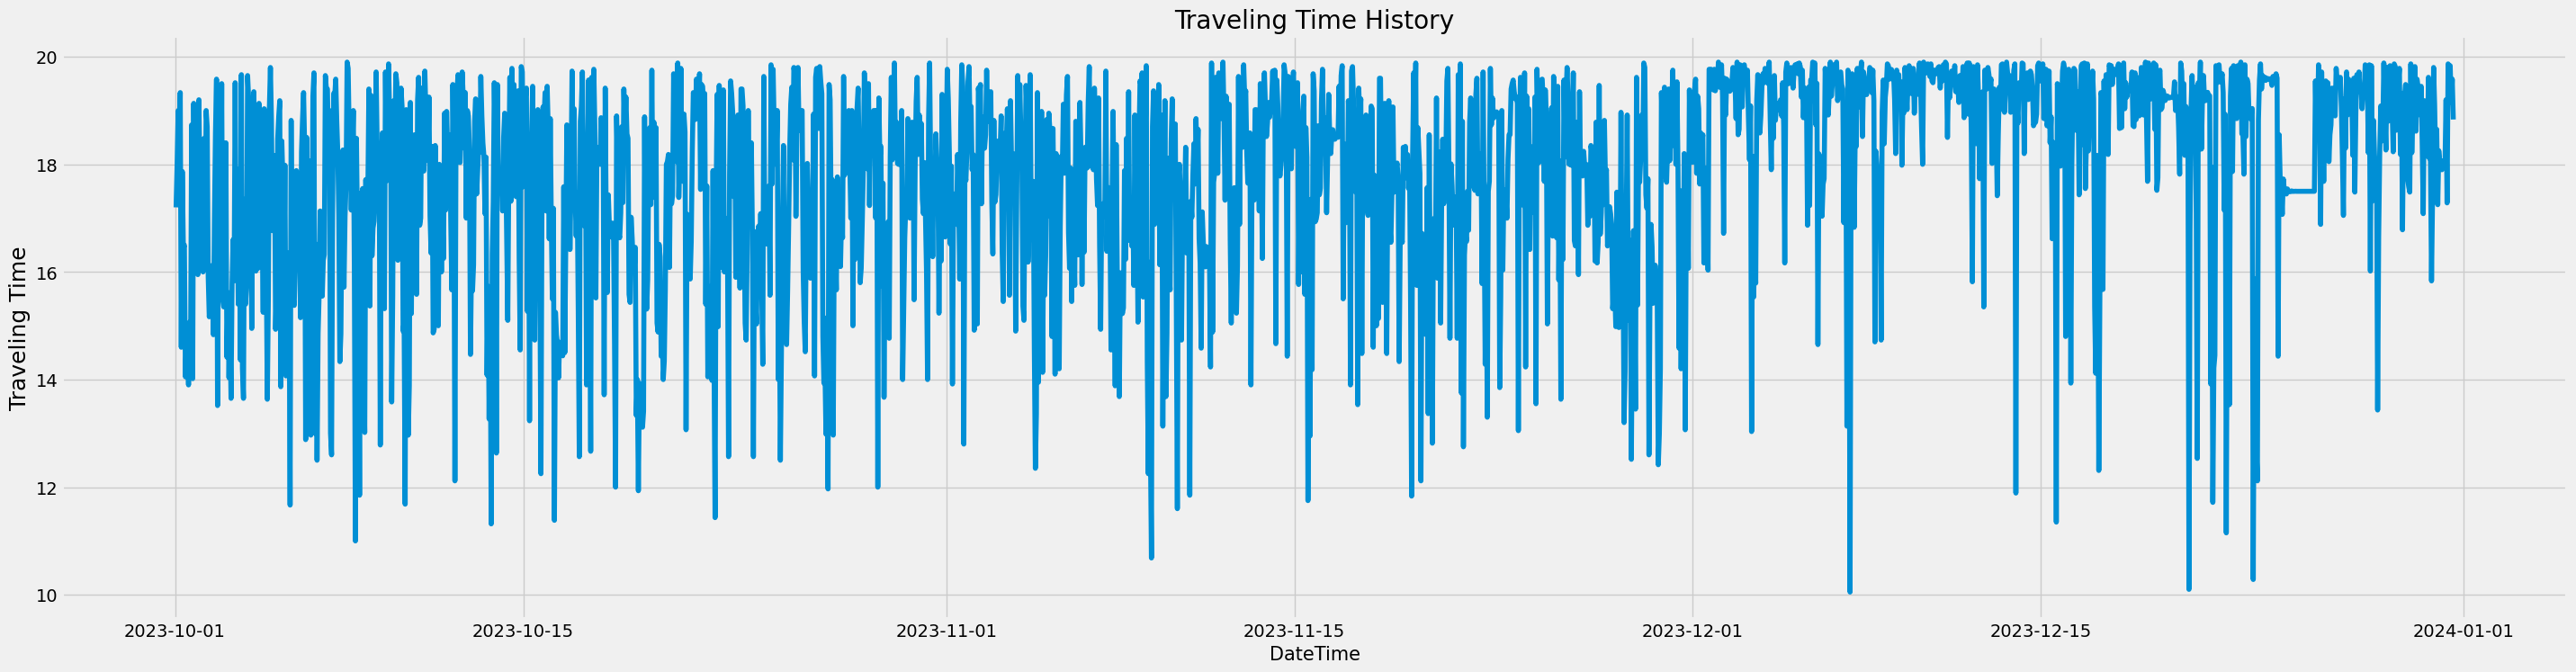

In [8]:
plt.figure(figsize=(32,8)) #ini ukuran diagramnya
plt.title('Traveling Time History') #Beri nama visualnya dengan nama 'Close Price History'

#We give the plot the data (the closing price of our stock)
plt.plot(NewDataSet['TravelingTime'])

#Labelin axis x dan y nya
plt.xlabel('DateTime', fontsize=15)
plt.ylabel('Traveling Time', fontsize=18)

plt.show()

In [9]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

In [10]:
train_start_dt = '2023-10-01 00:00:00'
test_start_dt = '2023-12-25 15:00:00'

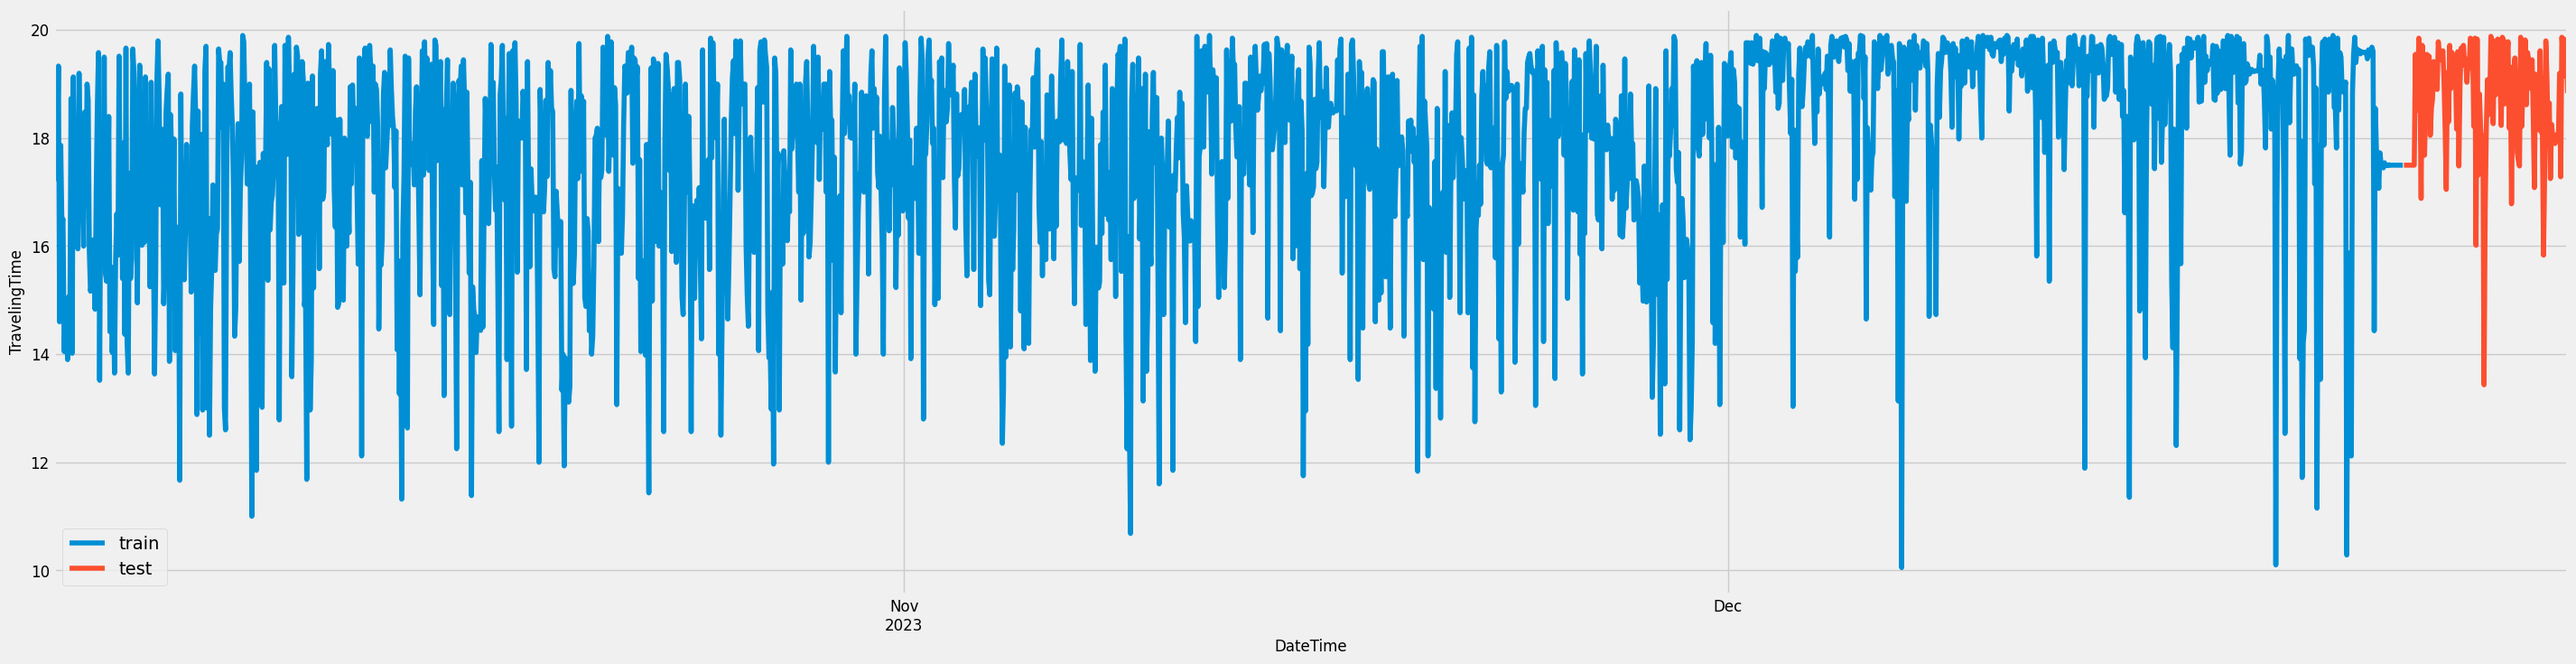

In [11]:
data[(data.index < test_start_dt) & (data.index >= train_start_dt)][['TravelingTime']].rename(columns={'TravelingTime':'train'}) \
    .join(data[test_start_dt:][['TravelingTime']].rename(columns={'TravelingTime':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(32, 8), fontsize=12)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('TravelingTime', fontsize=12)
plt.show()

In [12]:
train = data.copy()[(data.index >= train_start_dt) & (data.index < test_start_dt)][['TravelingTime']]
test = data.copy()[data.index >= test_start_dt][['TravelingTime']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (2054, 1)
Test data shape:  (144, 1)


In [13]:
train.to_excel('C:/Users/ASUS/Document/Documents/.0DataProcessing/#quarterly/1Q1/head train knn.xlsx', index=True)

In [14]:
#scaling train set
scaler = MinMaxScaler(feature_range=(0,1))
train['TravelingTime'] = scaler.fit_transform(train)
train.head(5)

TravelingTime
DateTime                          
2023-10-01 01:00:00       0.725888
2023-10-01 02:00:00       0.807107
2023-10-01 03:00:00       0.908629
2023-10-01 04:00:00       0.790186
2023-10-01 05:00:00       0.942470

In [15]:

#scaling test set
test['TravelingTime'] = scaler.transform(test)
test.head(5)

TravelingTime
DateTime                          
2023-12-25 15:00:00       0.756216
2023-12-25 16:00:00       0.756218
2023-12-25 17:00:00       0.756219
2023-12-25 18:00:00       0.756218
2023-12-25 19:00:00       0.756218

In [16]:

#Converting to numpy
train_data = train.values
test_data = test.values

In [17]:

test_data.shape

(144, 1)

In [18]:
# Selecting the timesteps

timesteps=5

In [19]:
# Converting train data to 2D tensor
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps

array([[0.72588832, 0.8071066 , 0.90862944, 0.79018613, 0.94247039],
       [0.8071066 , 0.90862944, 0.79018613, 0.94247039, 0.46192893],
       [0.90862944, 0.79018613, 0.94247039, 0.46192893, 0.79357022],
       ...,
       [0.7561967 , 0.75623109, 0.75623199, 0.75620697, 0.75621669],
       [0.75623109, 0.75623199, 0.75620697, 0.75621669, 0.75622169],
       [0.75623199, 0.75620697, 0.75621669, 0.75622169, 0.75621933]])

In [20]:
# Converting test data to 2D tensor

test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(140, 5)

In [21]:
#Select inputs and outputs from training and test data:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2050, 4) (2050, 1)
(140, 4) (140, 1)


In [22]:
from sklearn import neighbors
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [23]:
model1 = neighbors.KNeighborsRegressor(n_neighbors= 11)
model1.fit(x_train, y_train) 



KNeighborsRegressor(n_neighbors=11)

In [24]:
# Create model using RBF kernel
model2 = SVR(kernel='linear',gamma=0.001, epsilon= 0.01, C=1.0) 
# Fit model on training data
model2.fit(x_train, y_train[:,0])

SVR(epsilon=0.01, gamma=0.001, kernel='linear')

In [25]:
# Making predictions fir train set and test set

y_train_pred = model1.predict(x_train).reshape(-1,1)
y_test_pred = model1.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test_pred.shape)

(2050, 1) (140, 1)


In [26]:
# Making predictions fir train set and test set

y_train_pred2 = model2.predict(x_train).reshape(-1,1)
y_test_pred2 = model2.predict(x_test).reshape(-1,1)

print(y_train_pred2.shape, y_test_pred2.shape)

(2050, 1) (140, 1)


In [27]:
y_train_pred

array([[0.85679126],
       [0.7616136 ],
       [0.68475042],
       ...,
       [0.75621011],
       [0.75620963],
       [0.75620963]])

In [28]:
y_train

array([[0.94247039],
       [0.46192893],
       [0.79357022],
       ...,
       [0.75621669],
       [0.75622169],
       [0.75621933]])

In [29]:
y_train_pred.shape

(2050, 1)

In [30]:
#  Reverse Scaling the predictions

y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

2050 140


In [31]:
#  Reverse Scaling the predictions

y_train_pred2 = scaler.inverse_transform(y_train_pred2)
y_test_pred2 = scaler.inverse_transform(y_test_pred2)

print(len(y_train_pred2), len(y_test_pred2))

2050 140


In [32]:
y_train_pred2

array([[18.16269433],
       [18.63593255],
       [17.6419681 ],
       ...,
       [17.68939956],
       [17.68943154],
       [17.68942259]])

In [33]:
# Scaling the original values

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

2050 140


In [34]:
y_train

array([[19.33333333],
       [14.6       ],
       [17.86666667],
       ...,
       [17.49873438],
       [17.4987836 ],
       [17.49876044]])

In [35]:
y_test

array([[17.49874675],
       [17.49875112],
       [17.49875092],
       [17.49874957],
       [17.49874959],
       [17.4987503 ],
       [19.55      ],
       [18.51666667],
       [18.74999999],
       [19.85000001],
       [19.        ],
       [16.88333333],
       [19.71666667],
       [18.5       ],
       [17.68333333],
       [18.61666667],
       [19.55      ],
       [18.5875    ],
       [19.51666667],
       [18.05      ],
       [18.55      ],
       [18.73333333],
       [19.41666667],
       [19.05      ],
       [19.38333334],
       [18.9       ],
       [19.78333334],
       [19.51666667],
       [19.58333333],
       [19.44583333],
       [19.61666666],
       [19.06666667],
       [18.15      ],
       [17.04999999],
       [19.21666666],
       [18.29999999],
       [19.71666667],
       [18.91666667],
       [19.58333333],
       [19.33333334],
       [19.45      ],
       [19.32083333],
       [18.16666667],
       [19.6       ],
       [17.48333333],
       [18

In [36]:
y_test_pred

array([[17.49866962],
       [17.49866962],
       [17.49866962],
       [17.49866962],
       [17.49866962],
       [17.49866962],
       [17.49866962],
       [17.88636364],
       [17.38276515],
       [17.50227273],
       [18.9375    ],
       [18.74545454],
       [17.6905303 ],
       [17.60016572],
       [17.99924242],
       [17.52310606],
       [17.66950758],
       [18.67575758],
       [17.71212121],
       [19.00094697],
       [18.91893939],
       [18.11117424],
       [18.67561553],
       [18.10719697],
       [18.72190163],
       [19.06384943],
       [18.12818154],
       [18.78181818],
       [19.28863637],
       [19.0719697 ],
       [19.51468543],
       [19.61812569],
       [18.61363636],
       [18.7625    ],
       [17.82348485],
       [16.83939394],
       [17.30227273],
       [18.69772727],
       [18.38409091],
       [19.04185606],
       [19.13712121],
       [19.3486624 ],
       [19.43787879],
       [18.74393939],
       [18.52045455],
       [17

In [37]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
rmse, mae

(1.1748769544340147, 0.9049478343600649)

In [38]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse = sqrt(mean_squared_error(y_test, y_test_pred2))
mae =mae(y_test, y_test_pred2)
rmse, mae

(0.9866085803302945, 0.6864215844868619)

In [39]:
y_train.shape, y_test.shape

((2050, 1), (140, 1))

In [40]:
y_train_pred.shape

(2050, 1)

In [41]:
y_test_pred.shape

(140, 1)

In [42]:
train_timestamps = data[(data.index < test_start_dt) & (data.index >= train_start_dt)].index[timesteps-1:]
test_timestamps = data[test_start_dt:].index[timesteps-1:]

print(len(train_timestamps), len(test_timestamps))


2050 140


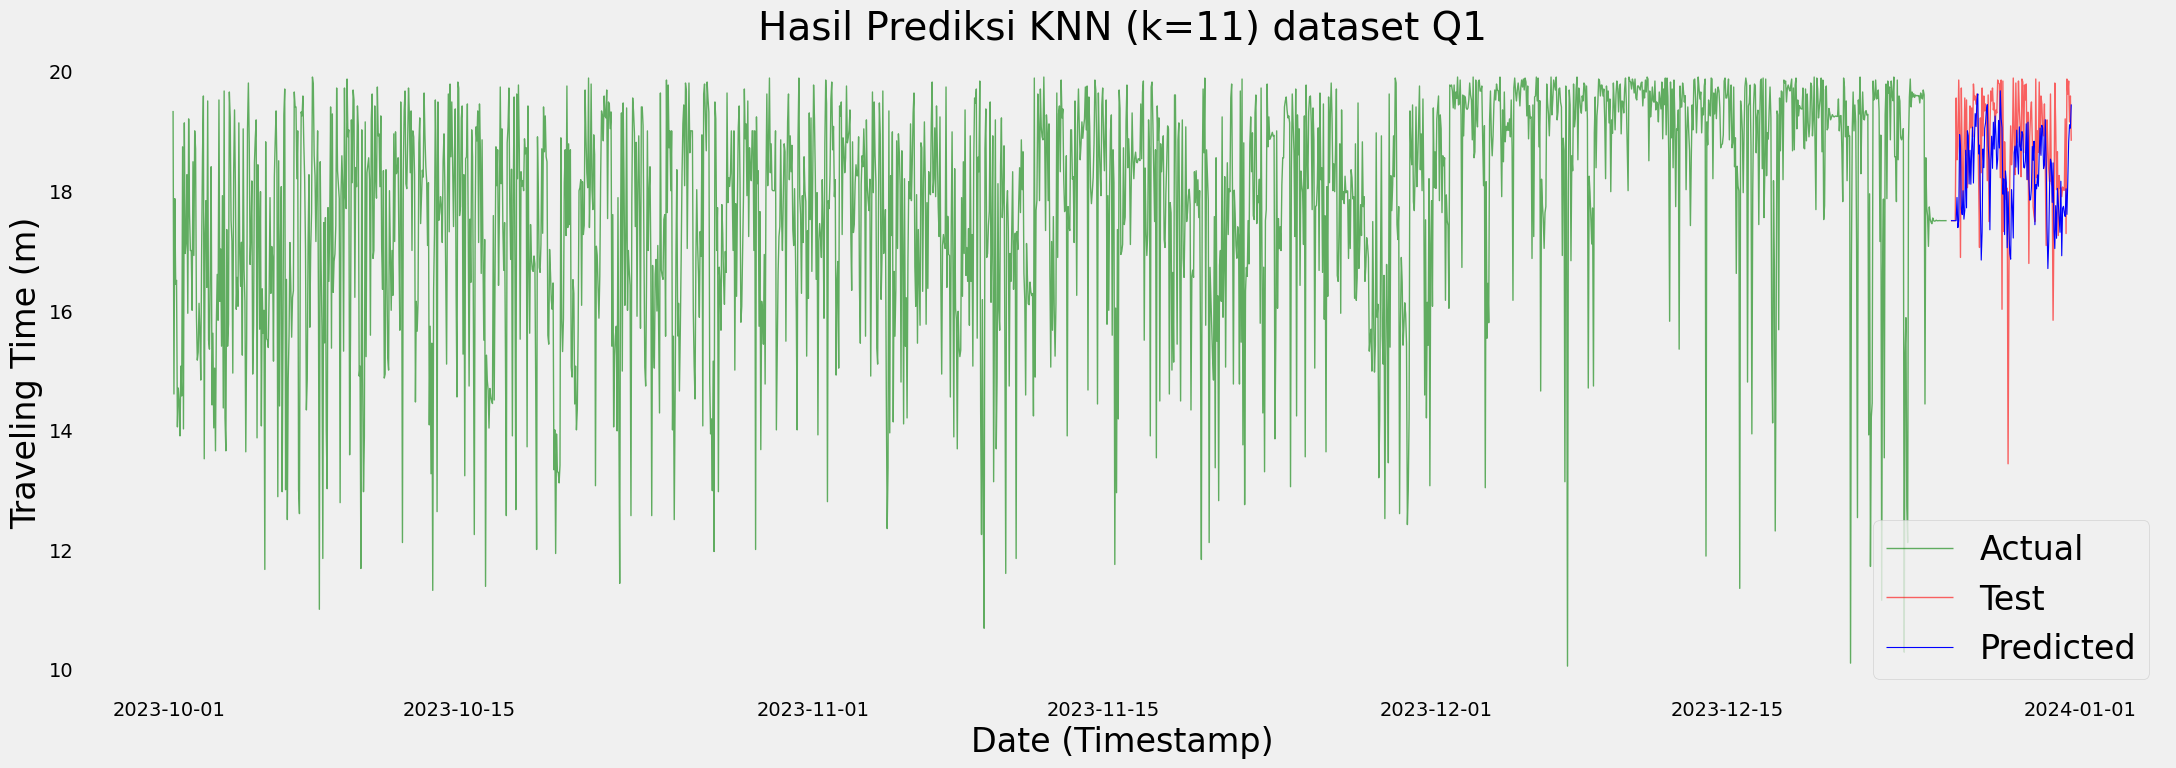

In [43]:
#Visualizing  Actual train set values against predicted train setvalues
plt.figure(figsize=(24,8))
plt.plot(train_timestamps, y_train, color = 'green', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test, color = 'red', linewidth=1.0, alpha = 0.6)
plt.plot(test_timestamps, y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Test','Predicted'], fontsize=24)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Hasil Prediksi KNN (k=11) dataset Q1", fontsize=28)
plt.grid()
plt.show()

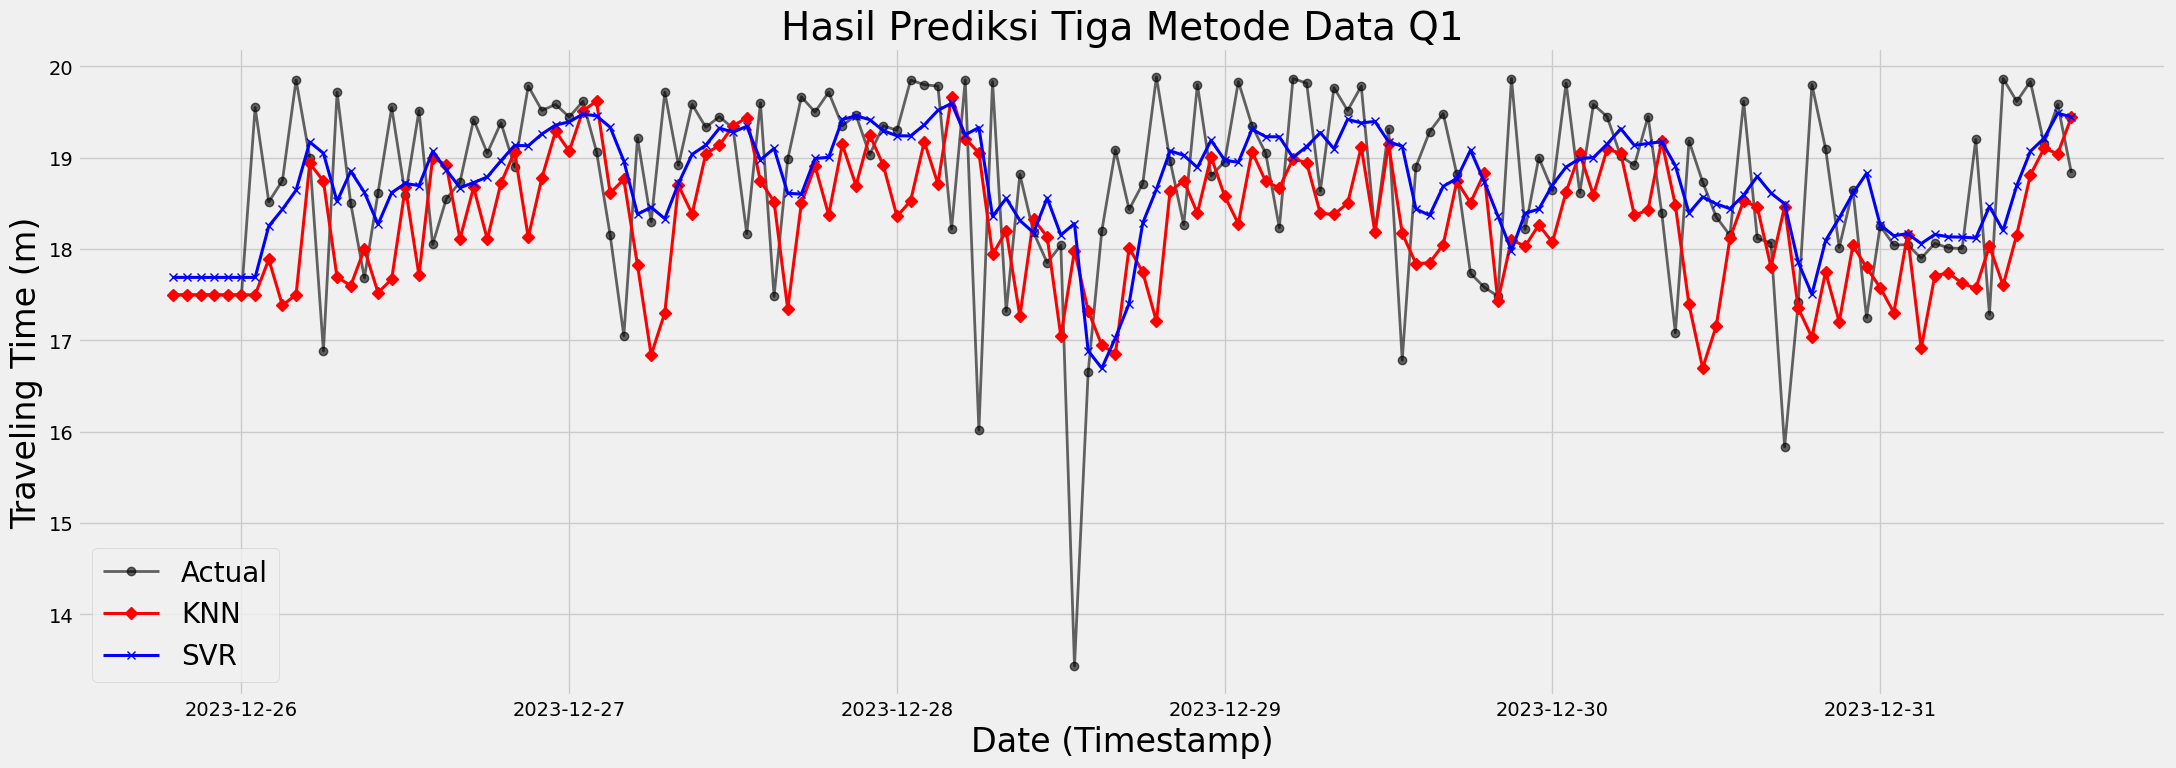

In [44]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.0, alpha = 0.6, marker='o', markersize=6)
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6)
plt.legend(['Actual','KNN', 'SVR'], fontsize=20)
plt.xlabel('Date (Timestamp)', fontsize=24)
plt.ylabel('Traveling Time (m)', fontsize=24)
plt.title("Hasil Prediksi Tiga Metode Data Q1", fontsize=28)
plt.show()

In [45]:

# Report Accuracy metrics for training
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100 # MAPE
  me = np.mean(forecast - actual) # ME
  mae = np.mean(np.abs(forecast - actual)) # MAE
  mpe = np.mean((forecast - actual)/actual) # MPE
  rmse = np.mean((forecast - actual)**2)**.5 # RMSE
  u_statistics = (np.mean((forecast - actual)**2)**.5)/((np.mean((forecast)**2)**.5)*(np.mean((actual)**2)**.5)) # Theils U Statistics
  return({'MAPE':mape, 'ME':me, 'MAE': mae, 'MPE': mpe, 'RMSE':rmse,'Theils U Statistics':u_statistics})

In [46]:
forecast_accuracy(y_test_pred, y_test)

{'MAPE': 4.883930613227127,
 'ME': -0.4445864091517248,
 'MAE': 0.9049478343600649,
 'MPE': -0.021109887756563347,
 'RMSE': 1.1748769544340147,
 'Theils U Statistics': 0.0034298095276928983}

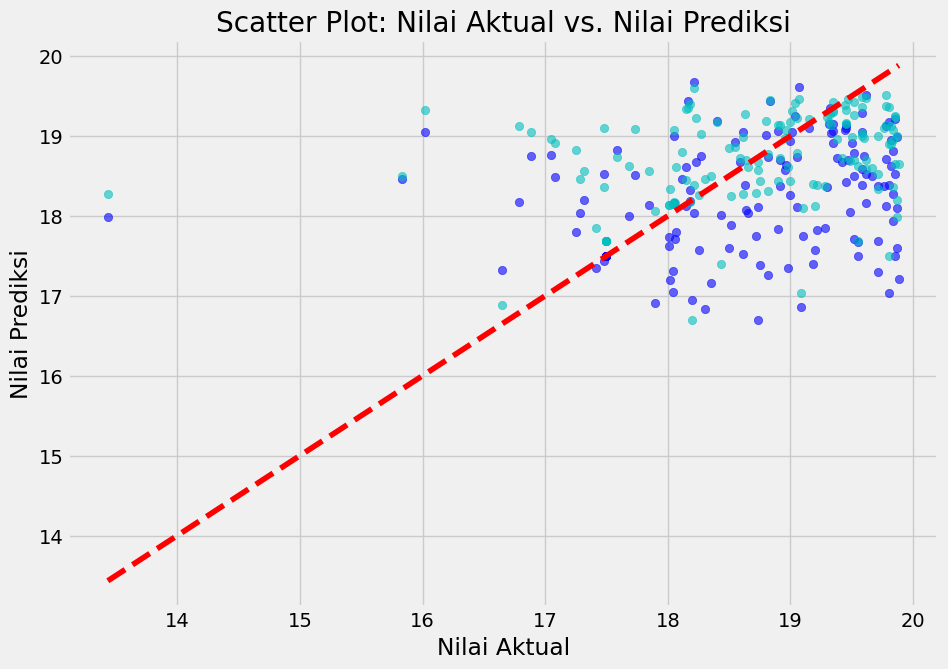

In [47]:
# Scatter Plot: Nilai Aktual vs. Nilai Prediksi
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b')
plt.scatter(y_test, y_test_pred2, alpha=0.6, color = 'c')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Aktual vs. Nilai Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

In [48]:
data = NewDataSet.filter(['TravelingTime'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * 0.938 )

training_data_len

2062

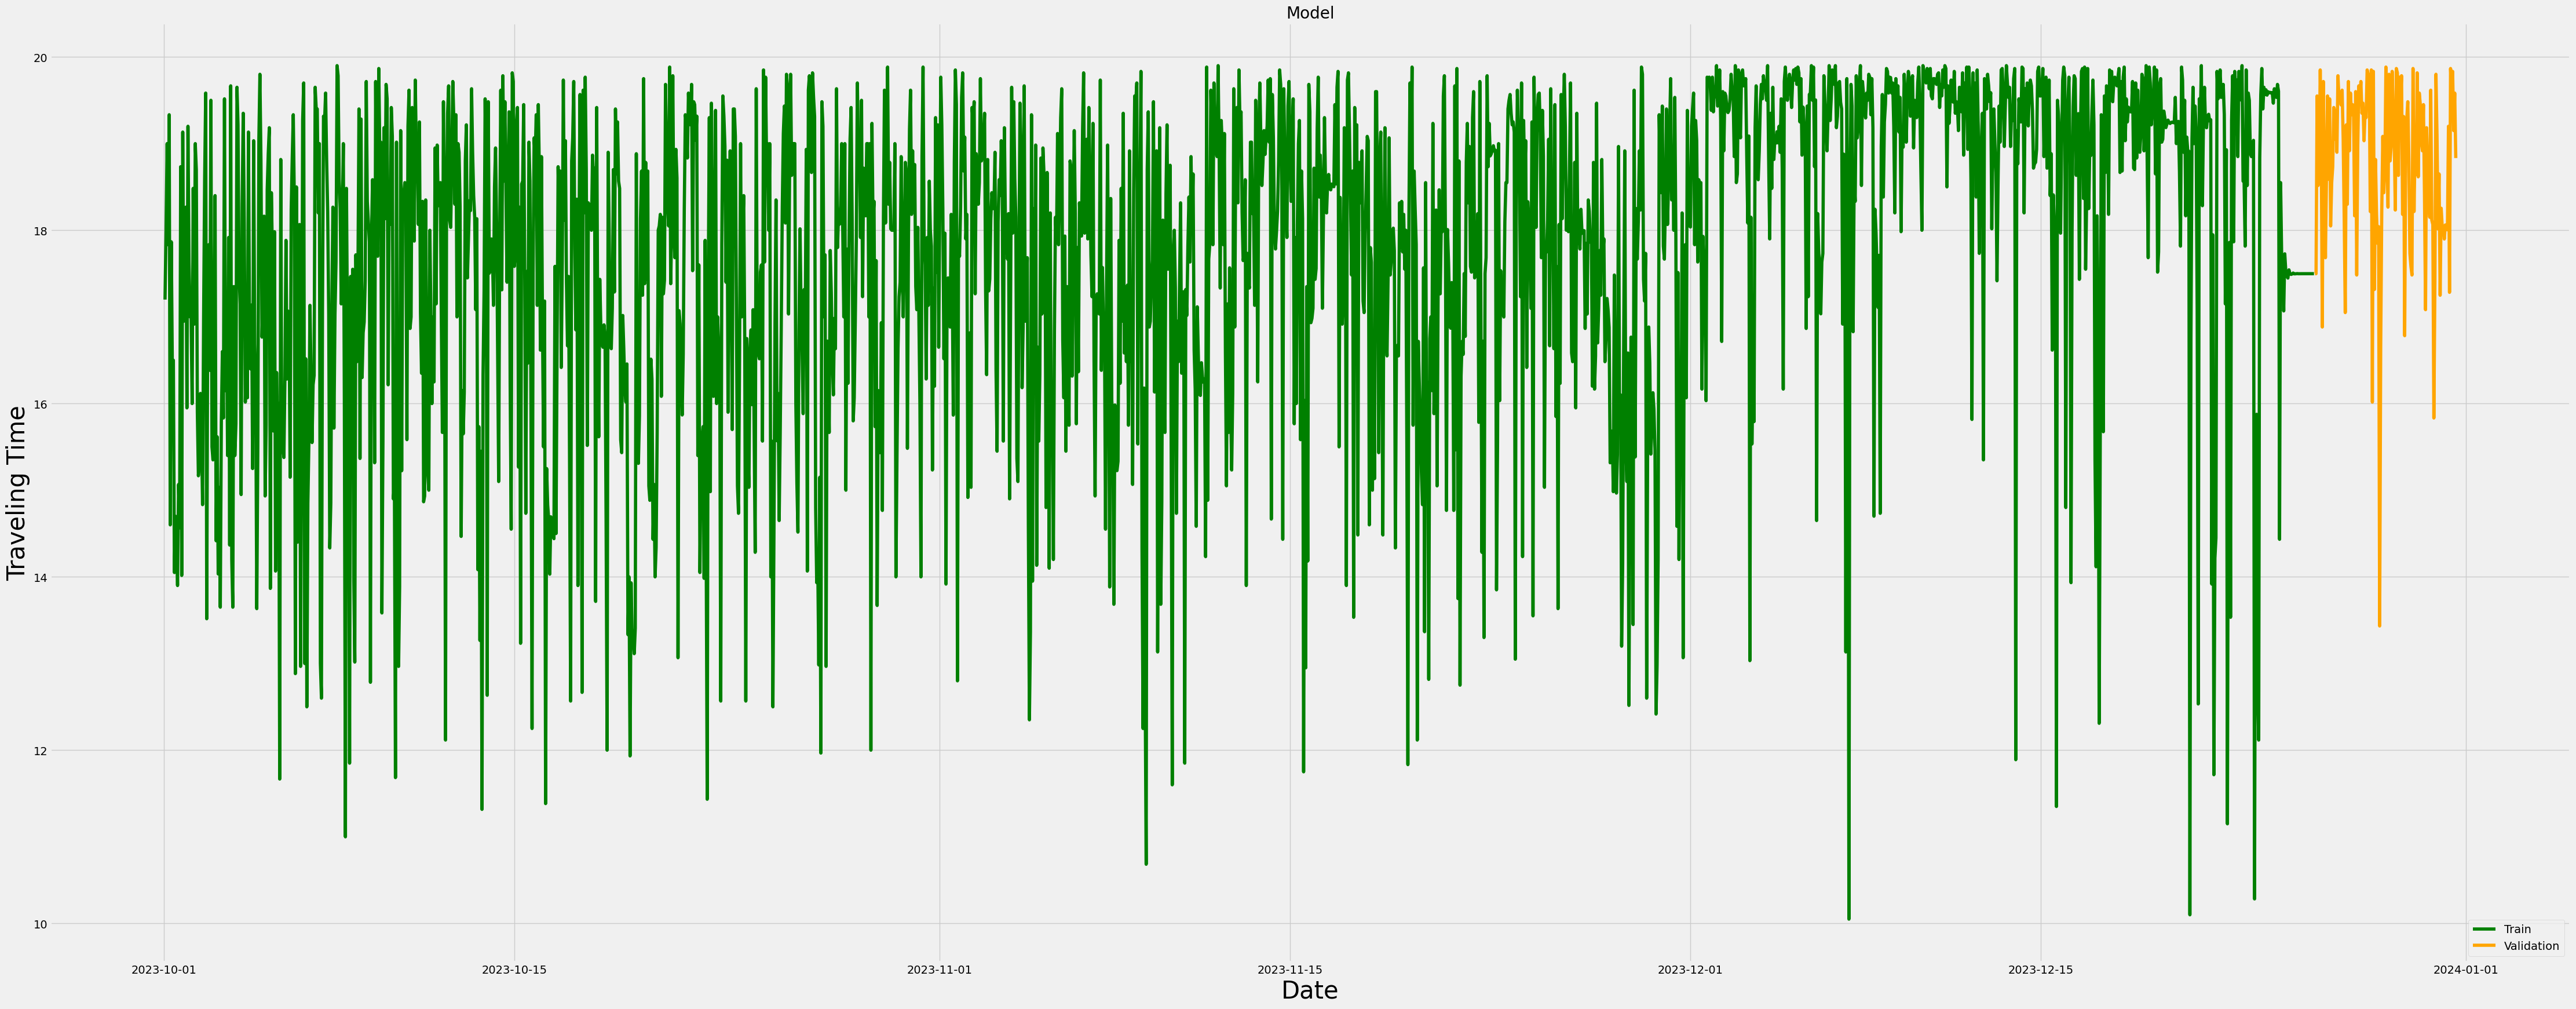

In [49]:
train = data[:training_data_len]
valid = data[training_data_len:]


plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [50]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

np.set_printoptions(threshold=np.inf)
print(scaled_data)

[[0.72588832]
 [0.8071066 ]
 [0.90862944]
 [0.79018613]
 [0.94247039]
 [0.46192893]
 [0.79357022]
 [0.64805415]
 [0.65482233]
 [0.40609137]
 [0.47208122]
 [0.4500846 ]
 [0.39086294]
 [0.50930626]
 [0.45854484]
 [0.88155668]
 [0.40270728]
 [0.92216582]
 [0.70050761]
 [0.71912014]
 [0.83417936]
 [0.59898477]
 [0.92893401]
 [0.77030457]
 [0.70558376]
 [0.70558376]
 [0.60406091]
 [0.85617597]
 [0.69712352]
 [0.90862944]
 [0.87817259]
 [0.59390863]
 [0.51945854]
 [0.53299492]
 [0.61590525]
 [0.56556684]
 [0.4856176 ]
 [0.70389171]
 [0.86632826]
 [0.9678511 ]
 [0.35194585]
 [0.73434856]
 [0.79018613]
 [0.642978  ]
 [0.95939086]
 [0.55329949]
 [0.53807107]
 [0.67343486]
 [0.84771574]
 [0.44331641]
 [0.56514382]
 [0.40439932]
 [0.50592217]
 [0.36548223]
 [0.5820643 ]
 [0.66497462]
 [0.58714044]
 [0.96108291]
 [0.61928934]
 [0.70812183]
 [0.54314721]
 [0.79864636]
 [0.43824027]
 [0.97631134]
 [0.4213198 ]
 [0.36548223]
 [0.74111675]
 [0.54314721]
 [0.58037225]
 [0.97461929]
 [0.93062606]
 [0.75

In [51]:
train_data = scaled_data[0:training_data_len, :] 

print(train_data)

[[0.72588832]
 [0.8071066 ]
 [0.90862944]
 [0.79018613]
 [0.94247039]
 [0.46192893]
 [0.79357022]
 [0.64805415]
 [0.65482233]
 [0.40609137]
 [0.47208122]
 [0.4500846 ]
 [0.39086294]
 [0.50930626]
 [0.45854484]
 [0.88155668]
 [0.40270728]
 [0.92216582]
 [0.70050761]
 [0.71912014]
 [0.83417936]
 [0.59898477]
 [0.92893401]
 [0.77030457]
 [0.70558376]
 [0.70558376]
 [0.60406091]
 [0.85617597]
 [0.69712352]
 [0.90862944]
 [0.87817259]
 [0.59390863]
 [0.51945854]
 [0.53299492]
 [0.61590525]
 [0.56556684]
 [0.4856176 ]
 [0.70389171]
 [0.86632826]
 [0.9678511 ]
 [0.35194585]
 [0.73434856]
 [0.79018613]
 [0.642978  ]
 [0.95939086]
 [0.55329949]
 [0.53807107]
 [0.67343486]
 [0.84771574]
 [0.44331641]
 [0.56514382]
 [0.40439932]
 [0.50592217]
 [0.36548223]
 [0.5820643 ]
 [0.66497462]
 [0.58714044]
 [0.96108291]
 [0.61928934]
 [0.70812183]
 [0.54314721]
 [0.79864636]
 [0.43824027]
 [0.97631134]
 [0.4213198 ]
 [0.36548223]
 [0.74111675]
 [0.54314721]
 [0.58037225]
 [0.97461929]
 [0.93062606]
 [0.75

In [52]:
x_train3 = []
y_train3 = []

for i in range(60, len(train_data)):
  x_train3.append(train_data[i-60:i, 0]) 
  y_train3.append(train_data[i, 0]) #y_train diisi value ke 61 (60)
  if i <= 60:
    print(x_train3)
    print(y_train3)
    print()

[array([0.72588832, 0.8071066 , 0.90862944, 0.79018613, 0.94247039,
       0.46192893, 0.79357022, 0.64805415, 0.65482233, 0.40609137,
       0.47208122, 0.4500846 , 0.39086294, 0.50930626, 0.45854484,
       0.88155668, 0.40270728, 0.92216582, 0.70050761, 0.71912014,
       0.83417936, 0.59898477, 0.92893401, 0.77030457, 0.70558376,
       0.70558376, 0.60406091, 0.85617597, 0.69712352, 0.90862944,
       0.87817259, 0.59390863, 0.51945854, 0.53299492, 0.61590525,
       0.56556684, 0.4856176 , 0.70389171, 0.86632826, 0.9678511 ,
       0.35194585, 0.73434856, 0.79018613, 0.642978  , 0.95939086,
       0.55329949, 0.53807107, 0.67343486, 0.84771574, 0.44331641,
       0.56514382, 0.40439932, 0.50592217, 0.36548223, 0.5820643 ,
       0.66497462, 0.58714044, 0.96108291, 0.61928934, 0.70812183])]
[0.5431472080117004]



In [53]:
x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))
x_train3.shape

(2002, 60, 1)

In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [55]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train3, y_train3, batch_size=5, epochs=10, validation_split=0.2, verbose=1)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - loss: 0.0774 - val_loss: 0.0384
Epoch 2/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - loss: 0.0335 - val_loss: 0.0341
Epoch 3/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - loss: 0.0336 - val_loss: 0.0268
Epoch 4/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 0.0303 - val_loss: 0.0256
Epoch 5/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 26s 81ms/step - loss: 0.0326 - val_loss: 0.0383
Epoch 6/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - loss: 0.0324 - val_loss: 0.0300
Epoch 7/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 0.0324 - val_loss: 0.0252
Epoch 8/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 0.0331 - val_loss: 0.0238
Epoch 9/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - loss: 0.0288 - val_loss: 0.0301
Epoch 10/10
321/321 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - loss: 0.0303 - val_loss: 0.0236


In [56]:
test_data = scaled_data[training_data_len - 60:]

x_test3 = []
y_test3 = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test3.append(test_data[i-60:i, 0])

x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
x_test3.shape

(136, 60, 1)

In [57]:
predictions3 = model.predict(x_test3)
predictions3 = scaler.inverse_transform(predictions3)
predictions3

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


array([[17.833958],
       [17.835007],
       [17.838402],
       [18.220589],
       [18.361471],
       [18.463356],
       [18.729614],
       [18.773788],
       [18.362001],
       [18.522312],
       [18.49096 ],
       [18.288664],
       [18.28881 ],
       [18.492828],
       [18.48925 ],
       [18.627398],
       [18.467236],
       [18.403076],
       [18.40565 ],
       [18.548046],
       [18.603031],
       [18.691631],
       [18.666037],
       [18.7967  ],
       [18.859331],
       [18.904009],
       [18.902672],
       [18.927597],
       [18.838453],
       [18.587326],
       [18.189526],
       [18.289558],
       [18.276718],
       [18.523493],
       [18.592768],
       [18.74334 ],
       [18.812986],
       [18.870947],
       [18.882124],
       [18.662601],
       [18.742245],
       [18.445871],
       [18.46406 ],
       [18.652615],
       [18.784147],
       [18.90752 ],
       [18.917473],
       [18.92422 ],
       [18.840368],
       [18.824627],


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14928\276240779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


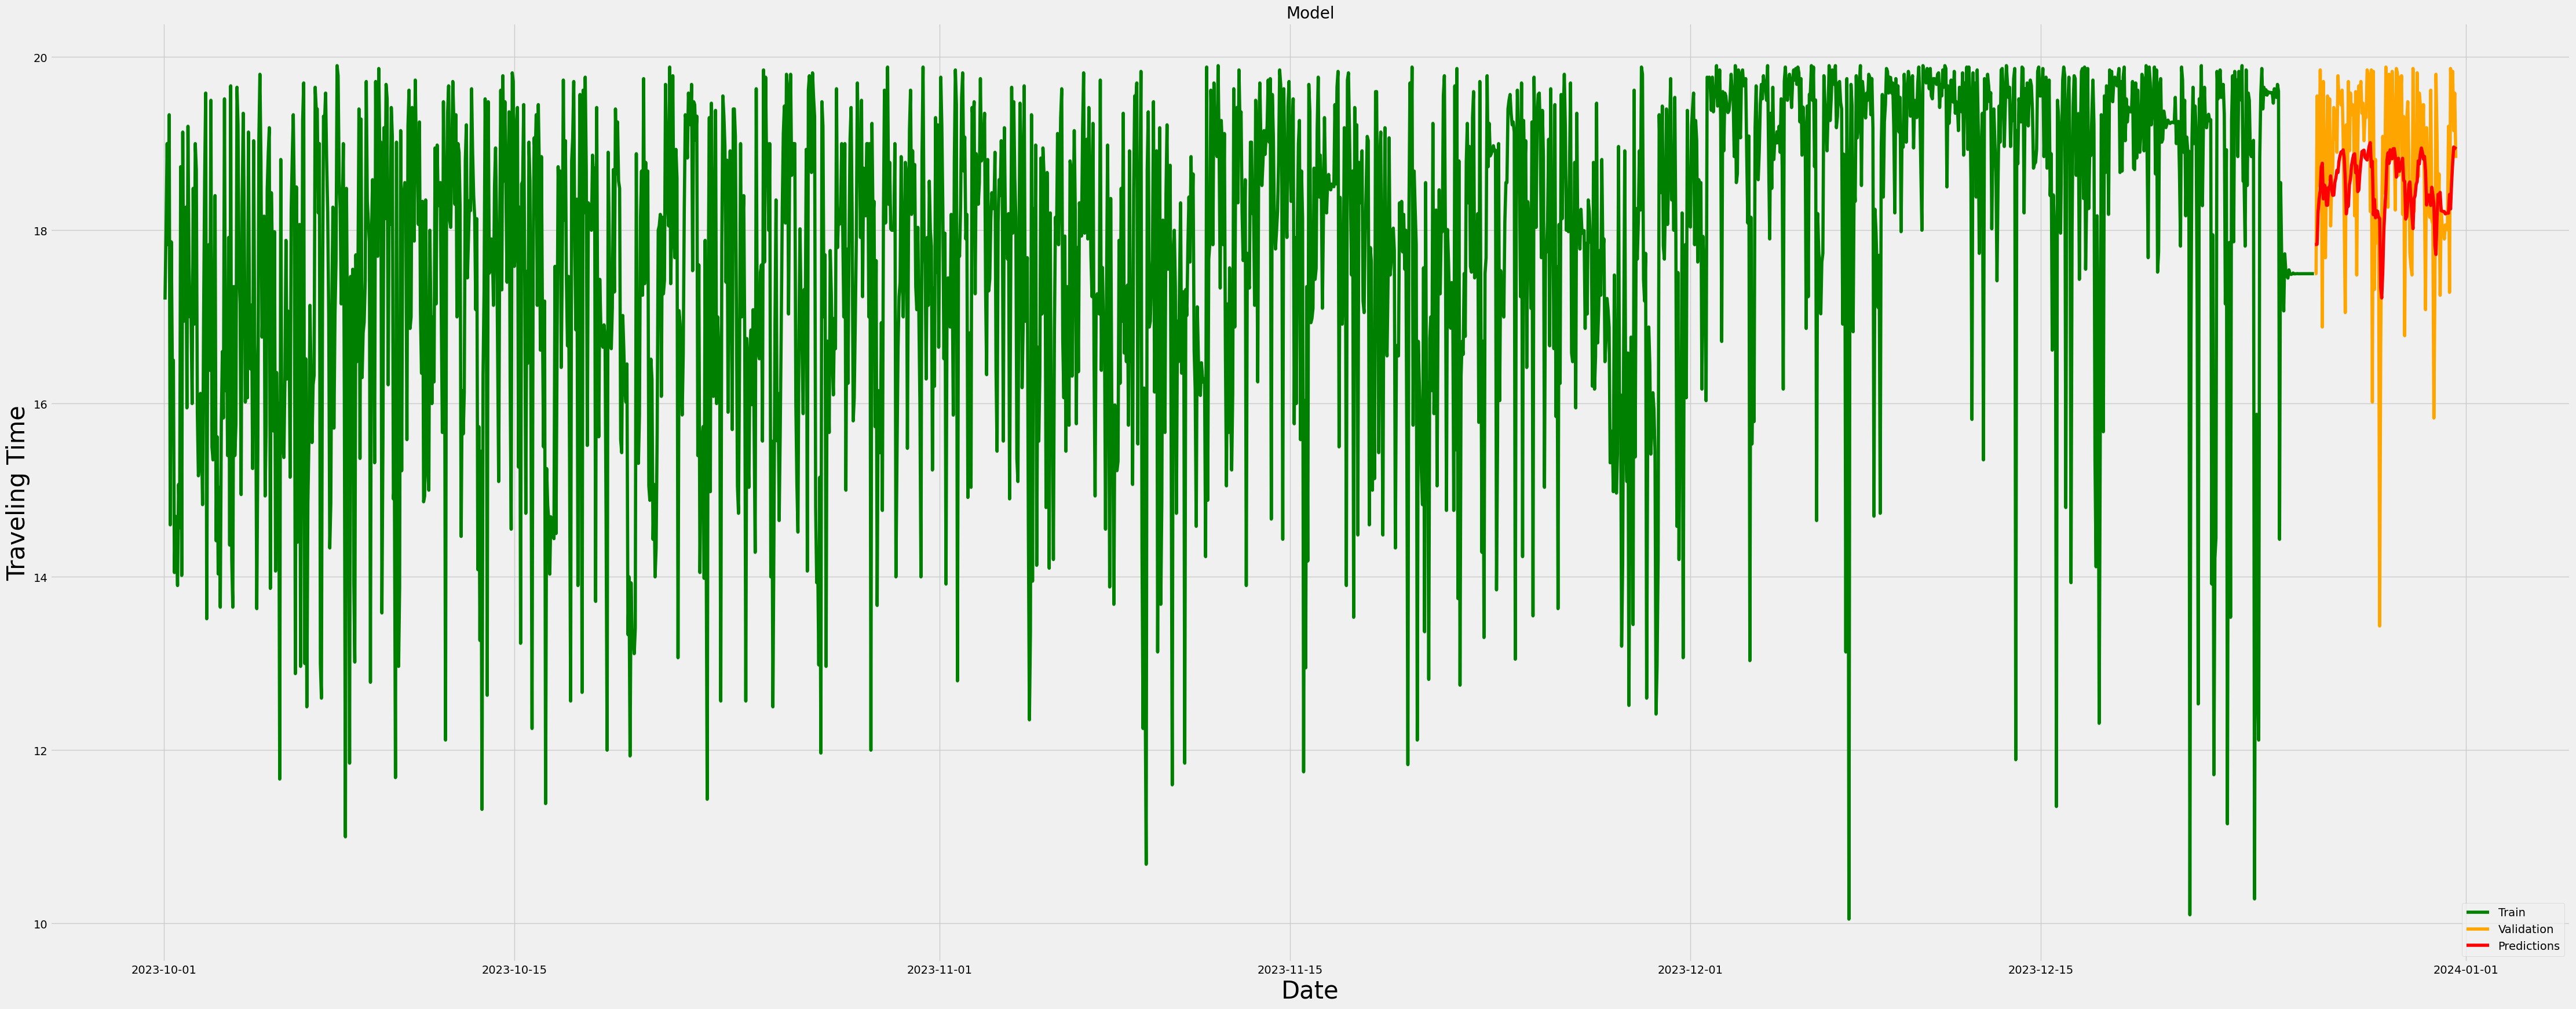

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)

plt.plot(train['TravelingTime'], color='green', label='Actual')
plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14928\2797276460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


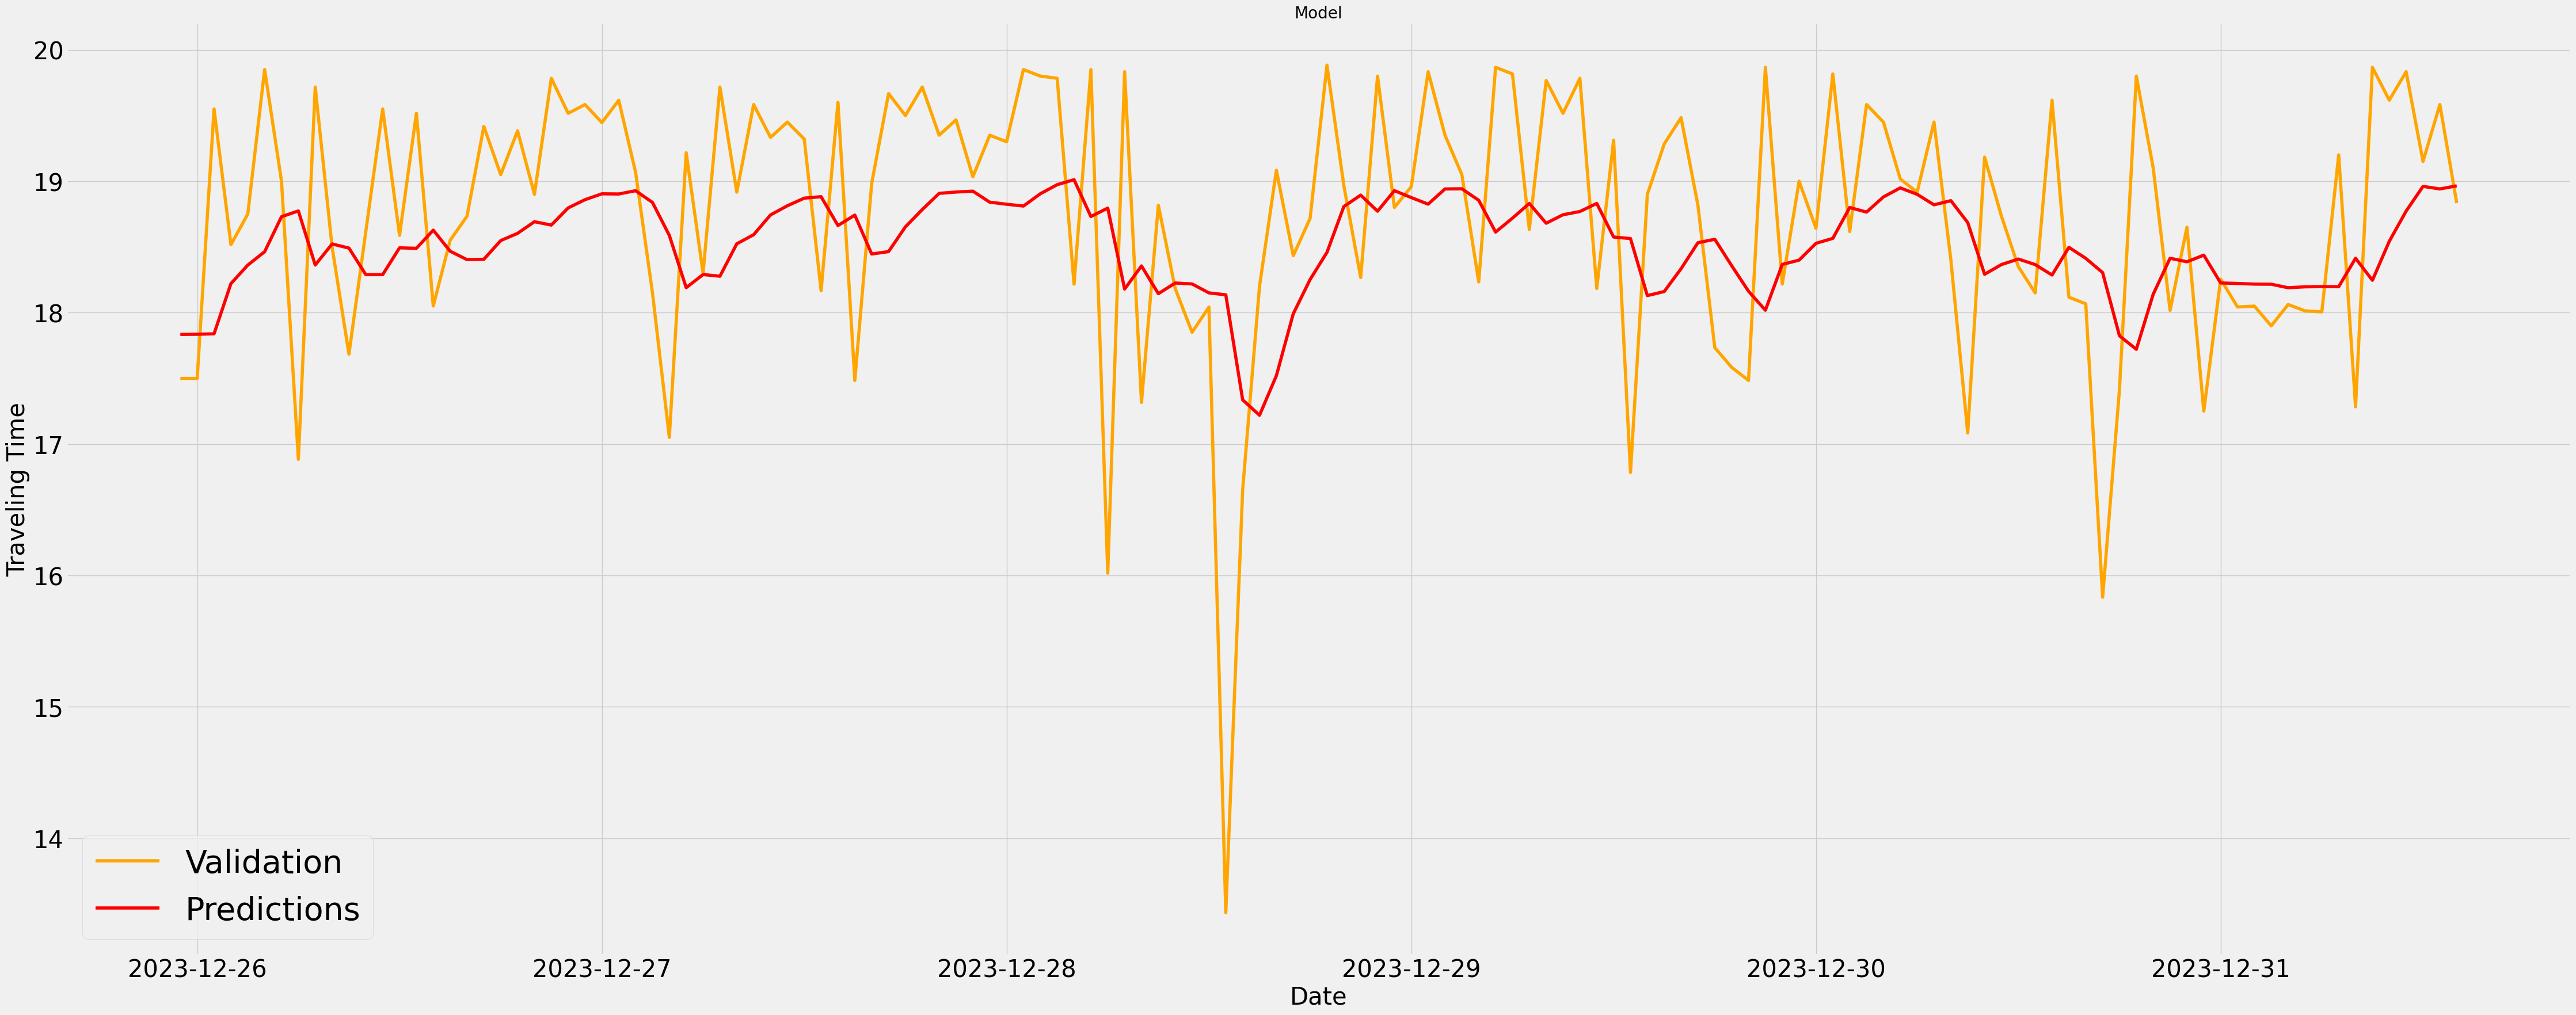

In [59]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3

plt.figure(figsize=(50,20))
plt.title('Model')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Traveling Time', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.plot(valid['TravelingTime'], color="orange", label='validation')
plt.plot(valid['Predictions'], color="red", label='Prediction')

plt.legend([ 'Validation', 'Predictions'], fontsize="40", loc ="lower left")
plt.show()

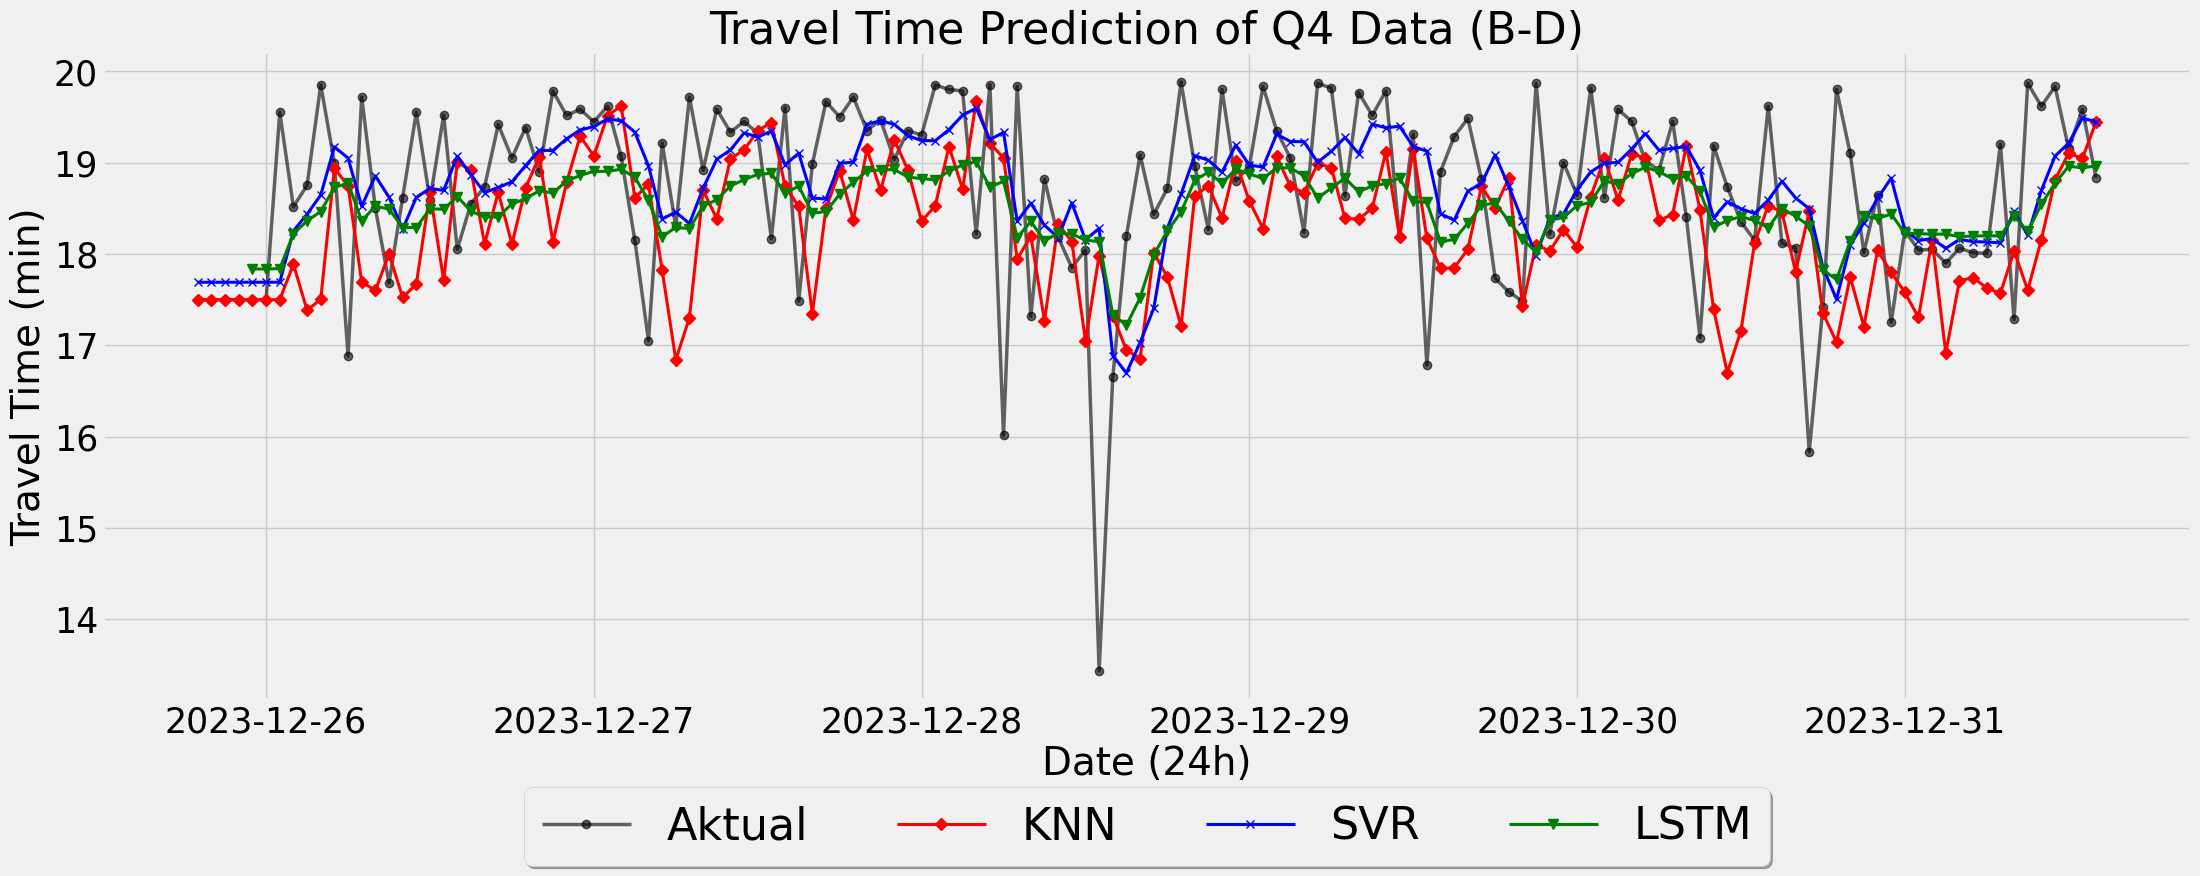

In [76]:
plt.figure(figsize=(24,8))
plt.plot(test_timestamps, y_test, color = 'black', linewidth=2.5, alpha = 0.6, marker='o', markersize=6, label='Aktual')
plt.plot(test_timestamps, y_test_pred, color = 'red', linewidth=2.2, marker='D', markersize=6)
plt.plot(test_timestamps, y_test_pred2, color = 'blue', linewidth=2.2, marker='x', markersize=6, label='SVR')
plt.plot(valid['Predictions'], color="g", linewidth=2.2, marker='v', markersize=7)
#plt.legend(['Aktual','KNN', 'SVR', 'LSTM'], fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Date (24h)', fontsize=28)
plt.ylabel('Travel Time (min)', fontsize=28)
plt.title("Travel Time Prediction of Q4 Data (B-D)", fontsize=32)
# Mengatur ukuran font untuk label sumbu x dan y
plt.tick_params(axis='x', labelsize=25)  # Ukuran font untuk label sumbu x
plt.tick_params(axis='y', labelsize=25)  # Ukuran font untuk label sumbu y

plt.legend(['Aktual','KNN', 'SVR', 'LSTM'], fontsize=32, loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=4, 
           )
plt.show()

In [61]:
#KNN

from sklearn.metrics import mean_absolute_error as mae 
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
mae =mae(y_test, y_test_pred)
range_data = y_test.max() - y_test.min()
rmse_percent = (rmse / range_data) * 100
print('RMSE:', rmse, 'MAE:', mae, "RMSE as percentage of data range:", rmse_percent, "%")

RMSE: 1.1748769544340147 MAE: 0.9049478343600649 RMSE as percentage of data range: 18.215146583133933 %


In [62]:
#SVR
from math import *
from sklearn.metrics import mean_absolute_error as mae
 
rmse2 = sqrt(mean_squared_error(y_test, y_test_pred2))
mae2 =mae(y_test, y_test_pred2)
range_data2 = y_test.max() - y_test.min()
rmse_percent2 = (rmse2 / range_data2) * 100
print('RMSE:', rmse2, 'MAE:', mae2, "RMSE as percentage of data range:", rmse_percent2, "%")

RMSE: 0.9866085803302945 MAE: 0.6864215844868619 RMSE as percentage of data range: 15.296257061703486 %


In [63]:
#LSTM
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error
import math
from numpy import sqrt 

rmse3 = sqrt(mean_squared_error(y_test3, predictions3))
mae3 =mae(y_test3, predictions3)
range_data3 = y_test.max() - y_test.min()
rmse_percent3 = (rmse3 / range_data3) * 100
print('RMSE:', rmse3, 'MAE:', mae3, "RMSE as percentage of data range:", rmse_percent3, "%")

RMSE: 0.9834235582686379 MAE: 0.7566023313304681 RMSE as percentage of data range: 15.246876874693571 %
